In [22]:
import pandas as pd

In [23]:
sims_df = pd.read_csv('sim_export.csv')
sims_df

,Description1,Description2,similarity
0,"""d2:Sensorimotor_Control.txt""","""d6:Peripheral_Stimulus.txt""",0.360000
1,"""d6:Peripheral_Stimulus.txt""","""d2:Sensorimotor_Control.txt""",0.360000
2,"""d5:Familial_Attributes.txt""","""d6:Central_Schema_Attributes.txt""",0.333333
3,"""d6:Central_Schema_Attributes.txt""","""d5:Familial_Attributes.txt""",0.333333
4,"""d1:Coping_Skills.txt""","""d6:Pain_Perception.txt""",0.300000
...,...,...,...
282,"""d2:Biomechanical_Attributes.txt""","""d2:Physical_Activity.txt""",0.045455
283,"""d5:Demographics.txt""","""d6:Pain_Experience.txt""",0.045455
284,"""d5:Demographics.txt""","""d1:Coping_Skills.txt""",0.041667
285,"""d5:Demographics.txt""","""d1:Pain_Beliefs.txt""",0.041667


In [24]:
import numpy as np
names = set(sims_df['Description1'].unique())
A = sims_df.set_index(['Description1','Description2'])['similarity'].unstack()
A = A.reindex(index=names,columns=names)
for i in range(len(A)):
    for j in range(len(A)):
        if i == j:
            A.iloc[i,j] = 1.
        elif np.isnan(A.iloc[i,j]) and np.isnan(A.iloc[j,i]):
            A.iloc[i,j] = 0
        elif np.isnan(A.iloc[i,j]):
            A.iloc[i,j] = A.iloc[j,i]
        elif np.isnan(A.iloc[j,i]):
            A.iloc[j,i] = A.iloc[i,j]
A

Description2,"""d1:Coping_Skills.txt""","""d1:Psychological_Resources.txt""","""d4:Physical_co-morbidities.txt""","""d6:Pain_Experience.txt""","""d3:Personal_Medical_History.txt""","""d1:Psychological_Attributes.txt""","""d2:Tissue_Tolerance.txt""","""d6:Functional_Consequence.txt""","""d3:Occupation.txt""","""d6:Pain_Perception.txt""",...,"""d5:Demographics.txt""","""d3:Socio-demographics.txt""","""d2:Load.txt""","""d6:Anatomy.txt""","""d5:Familial_Attributes.txt""","""d2:Physical_Activity.txt""","""d1:Affective_State.txt""","""d4:Systemic_Attributes.txt""","""d5:Genetics.txt""","""d6:Nociception_and_Neuropathic_Pain.txt"""
Description1,,,,,,,,,,,,,,,,,,,,,
"""d1:Coping_Skills.txt""",1.000000,0.125000,0.000000,0.200000,0.062500,0.000000,0.157895,0.150000,0.052632,0.300000,...,0.041667,0.076923,0.000000,0.000000,0.000000,0.181818,0.172414,0.125000,0.142857,0.000000
"""d1:Psychological_Resources.txt""",0.125000,1.000000,0.000000,0.000000,0.083333,0.125000,0.000000,0.153846,0.090909,0.200000,...,0.000000,0.111111,0.000000,0.000000,0.000000,0.125000,0.130435,0.111111,0.000000,0.000000
"""d4:Physical_co-morbidities.txt""",0.000000,0.000000,1.000000,0.000000,0.000000,0.100000,0.000000,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.095238,0.000000,0.000000,0.000000,0.090909,0.125000,0.105263
"""d6:Pain_Experience.txt""",0.200000,0.000000,0.000000,1.000000,0.000000,0.153846,0.111111,0.105263,0.125000,0.142857,...,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.100000,0.000000
"""d3:Personal_Medical_History.txt""",0.062500,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,0.148148,0.076923,0.062500,...,0.000000,0.058824,0.000000,0.000000,0.000000,0.062500,0.050000,0.083333,0.000000,0.000000
"""d1:Psychological_Attributes.txt""",0.000000,0.125000,0.100000,0.153846,0.000000,1.000000,0.000000,0.000000,0.100000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.136364,0.125000,0.153846,0.000000
"""d2:Tissue_Tolerance.txt""",0.157895,0.000000,0.000000,0.111111,0.000000,0.000000,1.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.076923,0.086957,0.153846,0.100000,0.000000,0.166667,0.000000,0.095238
"""d6:Functional_Consequence.txt""",0.150000,0.153846,0.133333,0.105263,0.148148,0.000000,0.000000,1.000000,0.062500,0.095238,...,0.047619,0.086957,0.000000,0.000000,0.142857,0.095238,0.148148,0.000000,0.000000,0.000000
"""d3:Occupation.txt""",0.052632,0.090909,0.000000,0.125000,0.076923,0.100000,0.000000,0.062500,1.000000,0.052632,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.052632,0.076923,0.000000,0.000000,0.000000


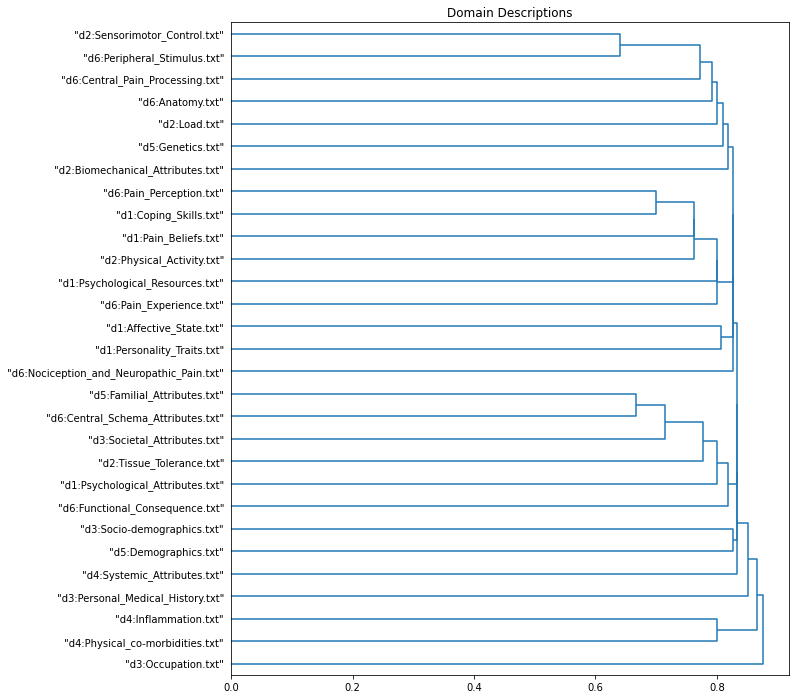

In [28]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
dists = squareform(1-A)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, orientation="right",labels=A.columns)
plt.title("Domain Descriptions")
plt.show()